### Read and explore the different datasets

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quilt
import seaborn as sns
import missingno as msno
import plotly.offline
import plotly_express as px


#pip install cufflinks
#pip install plotly_express
# import cufflinks
#cufflinks.__version__
#pip install cufflinks --upgrade
#pip install python-quilt
#import geopandas as gp
#pip install missingno

In [61]:
#Read datasets, no description available. ALl files available at http://www.tsb.gc.ca/eng/stats/aviation/data-5.html
df1 = pd.read_csv('ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv')
df2 = pd.read_csv('ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv')
#df3 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')
#df4 = pd.read_csv('ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv')

C:\ProgramData\Anaconda3\envs\Py36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (21,22,31,32,34,35,42,43,55,56,71,72,81,98,99,101,102,104,105,107,108,111,112,115,116,118,119,124,125,130,131,135,136,138,139,141,142,152,153,158,159,161,162,170,171,173,174,176,177,188,189,194,195,197,198,200,201,203,204,206,207,209,220,221,228,229,241,242) have mixed types. Specify dtype option on import or set low_memory=False.

C:\ProgramData\Anaconda3\envs\Py36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (17,42,43,50,88,103,104,106,107,109,110,113,114,119,122,123,137,138,140,141,152,153,155,156,157,159,160,161,163,164,166,167,171,172,174,175,177,178,181,182,187,188,192,193) have mixed types. Specify dtype option on import or set low_memory=False.



In [62]:
df1.head()

OccID     OccNo  AirportID AirportID_AirportName  AirportID_CountryID  \
0  152828  A19P0071     1984.0     Erik Nielsen Intl                  2.0   
1  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
2  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
3  152826  A19P0070      109.0     (CAMPBELL ISLAND)                  2.0   
4  152825  A19P0069     1912.0        Vancouver Intl                  2.0   

  AirportID_CountryID_DisplayEng AirportID_CountryID_DisplayFre  \
0                         CANADA                         CANADA   
1                         CANADA                         CANADA   
2                         CANADA                         CANADA   
3                         CANADA                         CANADA   
4                         CANADA                         CANADA   

   Airport_ProvinceID AirportID_ProvinceID_DisplayEng  \
0                24.0                           YUKON   
1                24.0                           YUKON   
2                24.0                           YUKON   
3                12.0                BRITISH COLUMBIA   
4                12.0                BRITISH COLUMBIA   

  AirportID_ProvinceID_DisplayFre  ... InitialPositionEnum_DisplayFre  \
0                           YUKON  ...                            NaN   
1                           YUKON  ...                            NaN   
2                           YUKON  ...                            NaN   
3            COLOMBIE-BRITANNIQUE  ...                            NaN   
4            COLOMBIE-BRITANNIQUE  ...                            NaN   

   FinalPositionEnum  FinalPositionEnum_DisplayEng  \
0                NaN                           NaN   
1                NaN                           NaN   
2                NaN                           NaN   
3                NaN                           NaN   
4                NaN                           NaN   

  FinalPositionEnum_DisplayFre FullProcedureIND  FullProcedureIND_DisplayEng  \
0                          NaN              NaN                          NaN   
1                          NaN              NaN                          NaN   
2                          NaN              NaN                          NaN   
3                          NaN              NaN                          NaN   
4                          NaN              NaN                          NaN   

   FullProcedureIND_DisplayFre SurfaceContaminationID  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

  SurfaceContaminationID_DisplayEng SurfaceContaminationID_DisplayFre  
0                               NaN                               NaN  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  

[5 rows x 246 columns]

In [63]:
#Rename occid

df2 = df2.rename(index=str, columns={"occid": "OccID"})

In [64]:
df2.shape

(57227, 194)

In [68]:
df2.head()

OccID     OccNo   AcID  AircraftID  AircraftVersion  RowStatus  \
0  152828  A19P0071  43955      106710              9.0          1   
1  152827  A19W0070  67261      131335              2.0          1   
2  152826  A19P0070  67259      131334              2.0          1   
3  152825  A19P0069  65985      130580              2.0          1   
4  152822  A19C0063  43825      106425              2.0          1   

  RegistrationNo SerialNo  AircraftTypeID AircraftTypeID_DisplayEng  ...  \
0         C-GJAZ    15036             1.0                 AEROPLANE  ...   
1         C-FANF    27417             1.0                 AEROPLANE  ...   
2         C-FQNG    61032             3.0                HELICOPTER  ...   
3         N403UA      442             1.0                 AEROPLANE  ...   
4         C-FARE    53112             3.0                HELICOPTER  ...   

  ReqSepTime  ActualSepHorizontal ActualSepHorizontalEnum  \
0        NaN                  NaN                     NaN   
1        NaN                  NaN                     NaN   
2        NaN                  NaN                     NaN   
3        NaN                  NaN                     NaN   
4        NaN                  NaN                     NaN   

  ActualSepHorizontalEnum_DisplayEng  ActualSepHorizontalEnum_DisplayFre  \
0                                NaN                                 NaN   
1                                NaN                                 NaN   
2                                NaN                                 NaN   
3                                NaN                                 NaN   
4                                NaN                                 NaN   

  ActualSepVertical ActualSepTime AtsUnitInvolvedEnum  \
0               NaN           NaN                 NaN   
1               NaN           NaN                 NaN   
2               NaN           NaN                 NaN   
3               NaN           NaN                 NaN   
4               NaN           NaN                 NaN   

   AtsUnitInvolvedEnum_DisplayEng AtsUnitInvolvedEnum_DisplayFre  
0                             NaN                            NaN  
1                             NaN                            NaN  
2                             NaN                            NaN  
3                             NaN                            NaN  
4                             NaN                            NaN  

[5 rows x 194 columns]

In [69]:
df2.columns

Index(['OccID', 'OccNo', 'AcID', 'AircraftID', 'AircraftVersion', 'RowStatus',
       'RegistrationNo', 'SerialNo', 'AircraftTypeID',
       'AircraftTypeID_DisplayEng',
       ...
       'ReqSepTime', 'ActualSepHorizontal', 'ActualSepHorizontalEnum',
       'ActualSepHorizontalEnum_DisplayEng',
       'ActualSepHorizontalEnum_DisplayFre', 'ActualSepVertical',
       'ActualSepTime', 'AtsUnitInvolvedEnum',
       'AtsUnitInvolvedEnum_DisplayEng', 'AtsUnitInvolvedEnum_DisplayFre'],
      dtype='object', length=194)

In [70]:
df2u = df2.OccID.nunique()
print (df2u)

43854


In [71]:
# df1_.reset_index().drop_duplicates().set_index(['OccId']) Doesn't work!

In [72]:
df1.shape

(47226, 246)

In [73]:
df1.head()

OccID     OccNo  AirportID AirportID_AirportName  AirportID_CountryID  \
0  152828  A19P0071     1984.0     Erik Nielsen Intl                  2.0   
1  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
2  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
3  152826  A19P0070      109.0     (CAMPBELL ISLAND)                  2.0   
4  152825  A19P0069     1912.0        Vancouver Intl                  2.0   

  AirportID_CountryID_DisplayEng AirportID_CountryID_DisplayFre  \
0                         CANADA                         CANADA   
1                         CANADA                         CANADA   
2                         CANADA                         CANADA   
3                         CANADA                         CANADA   
4                         CANADA                         CANADA   

   Airport_ProvinceID AirportID_ProvinceID_DisplayEng  \
0                24.0                           YUKON   
1                24.0                           YUKON   
2                24.0                           YUKON   
3                12.0                BRITISH COLUMBIA   
4                12.0                BRITISH COLUMBIA   

  AirportID_ProvinceID_DisplayFre  ... InitialPositionEnum_DisplayFre  \
0                           YUKON  ...                            NaN   
1                           YUKON  ...                            NaN   
2                           YUKON  ...                            NaN   
3            COLOMBIE-BRITANNIQUE  ...                            NaN   
4            COLOMBIE-BRITANNIQUE  ...                            NaN   

   FinalPositionEnum  FinalPositionEnum_DisplayEng  \
0                NaN                           NaN   
1                NaN                           NaN   
2                NaN                           NaN   
3                NaN                           NaN   
4                NaN                           NaN   

  FinalPositionEnum_DisplayFre FullProcedureIND  FullProcedureIND_DisplayEng  \
0                          NaN              NaN                          NaN   
1                          NaN              NaN                          NaN   
2                          NaN              NaN                          NaN   
3                          NaN              NaN                          NaN   
4                          NaN              NaN                          NaN   

   FullProcedureIND_DisplayFre SurfaceContaminationID  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

  SurfaceContaminationID_DisplayEng SurfaceContaminationID_DisplayFre  
0                               NaN                               NaN  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                               NaN                               NaN  
4                               NaN                               NaN  

[5 rows x 246 columns]

In [74]:
df1.columns

Index(['OccID', 'OccNo', 'AirportID', 'AirportID_AirportName',
       'AirportID_CountryID', 'AirportID_CountryID_DisplayEng',
       'AirportID_CountryID_DisplayFre', 'Airport_ProvinceID',
       'AirportID_ProvinceID_DisplayEng', 'AirportID_ProvinceID_DisplayFre',
       ...
       'InitialPositionEnum_DisplayFre', 'FinalPositionEnum',
       'FinalPositionEnum_DisplayEng', 'FinalPositionEnum_DisplayFre',
       'FullProcedureIND', 'FullProcedureIND_DisplayEng',
       'FullProcedureIND_DisplayFre', 'SurfaceContaminationID',
       'SurfaceContaminationID_DisplayEng',
       'SurfaceContaminationID_DisplayFre'],
      dtype='object', length=246)

In [75]:
unique_ = pd.DataFrame({'Dataset' :["AC","EVE"],#"OCC","SUR"], 
                        "Unique":[df1u,df2u]})#df3u,df4u
unique_.sort_values(by="Unique", ascending=False)

Dataset  Unique
0      AC   43855
1     EVE   43854

In [141]:
df = df1.merge(df2, how='left', left_on=('OccID','OccNo'), right_on=('OccID','OccNo'))

In [142]:
#dfm.TotalFatalCount

In [143]:
# from functools import reduce
# dfm = reduce(lambda left,right: pd.merge(left,right, on='OccID',how='inner'), dfs)

In [144]:
df.shape

(68258, 438)

In [145]:
df.head()

OccID     OccNo  AirportID AirportID_AirportName  AirportID_CountryID  \
0  152828  A19P0071     1984.0     Erik Nielsen Intl                  2.0   
1  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
2  152827  A19W0070     1984.0     Erik Nielsen Intl                  2.0   
3  152826  A19P0070      109.0     (CAMPBELL ISLAND)                  2.0   
4  152825  A19P0069     1912.0        Vancouver Intl                  2.0   

  AirportID_CountryID_DisplayEng AirportID_CountryID_DisplayFre  \
0                         CANADA                         CANADA   
1                         CANADA                         CANADA   
2                         CANADA                         CANADA   
3                         CANADA                         CANADA   
4                         CANADA                         CANADA   

   Airport_ProvinceID AirportID_ProvinceID_DisplayEng  \
0                24.0                           YUKON   
1                24.0                           YUKON   
2                24.0                           YUKON   
3                12.0                BRITISH COLUMBIA   
4                12.0                BRITISH COLUMBIA   

  AirportID_ProvinceID_DisplayFre  ... ReqSepTime  ActualSepHorizontal  \
0                           YUKON  ...        NaN                  NaN   
1                           YUKON  ...        NaN                  NaN   
2                           YUKON  ...        NaN                  NaN   
3            COLOMBIE-BRITANNIQUE  ...        NaN                  NaN   
4            COLOMBIE-BRITANNIQUE  ...        NaN                  NaN   

   ActualSepHorizontalEnum ActualSepHorizontalEnum_DisplayEng  \
0                      NaN                                NaN   
1                      NaN                                NaN   
2                      NaN                                NaN   
3                      NaN                                NaN   
4                      NaN                                NaN   

  ActualSepHorizontalEnum_DisplayFre  ActualSepVertical  ActualSepTime  \
0                                NaN                NaN            NaN   
1                                NaN                NaN            NaN   
2                                NaN                NaN            NaN   
3                                NaN                NaN            NaN   
4                                NaN                NaN            NaN   

  AtsUnitInvolvedEnum AtsUnitInvolvedEnum_DisplayEng  \
0                 NaN                            NaN   
1                 NaN                            NaN   
2                 NaN                            NaN   
3                 NaN                            NaN   
4                 NaN                            NaN   

  AtsUnitInvolvedEnum_DisplayFre  
0                            NaN  
1                            NaN  
2                            NaN  
3                            NaN  
4                            NaN  

[5 rows x 438 columns]

In [146]:
#Select relevant features, USE df=df[]!!!!
df = df[['OccID', 'OccNo', 'RegistrationNo', 'AircraftTypeID_DisplayEng', 'AircraftModelID_DisplayEng', 
      'OccTypeID_DisplayEng','AircraftMakeID_DisplayEng','OrganizationID_DisplayEng', 'OperatorTypeID_DisplayEng',
      'YearOfManuf','NumberOfEngine','OperationTypeID_DisplayEng','Latitude','Longitude', 
      'OccDate', 'OccTime', 'OccTypeID_DisplayEng', 'TotalFatalCount']]
df.head()

OccID     OccNo RegistrationNo AircraftTypeID_DisplayEng  \
0  152828  A19P0071         C-GJAZ                 AEROPLANE   
1  152827  A19W0070         C-FANF                 AEROPLANE   
2  152827  A19W0070         C-FANF                 AEROPLANE   
3  152826  A19P0070         C-FQNG                HELICOPTER   
4  152825  A19P0069         N403UA                 AEROPLANE   

  AircraftModelID_DisplayEng OccTypeID_DisplayEng AircraftMakeID_DisplayEng  \
0      CL-600-2D24 (CRJ 900)  INCIDENT REPORTABLE                BOMBARDIER   
1                    737-500  INCIDENT REPORTABLE                    BOEING   
2                    737-500  INCIDENT REPORTABLE                    BOEING   
3                      S-61N  INCIDENT REPORTABLE                  SIKORSKY   
4                   A320-200  INCIDENT REPORTABLE                    AIRBUS   

      OrganizationID_DisplayEng OperatorTypeID_DisplayEng YearOfManuf  \
0              JAZZ AVIATION LP                COMMERCIAL        2005   
1  AIR NORTH CHARTER & TRAINING                COMMERCIAL        1992   
2  AIR NORTH CHARTER & TRAINING                COMMERCIAL        1992   
3           VIH HELICOPTERS LTD                COMMERCIAL        1960   
4               UNITED AIRLINES                COMMERCIAL        1993   

   NumberOfEngine OperationTypeID_DisplayEng   Latitude   Longitude  \
0             2.0              AIR TRANSPORT  56.550000  129.260000   
1             2.0              AIR TRANSPORT  60.709444  135.067222   
2             2.0              AIR TRANSPORT  60.709444  135.067222   
3             2.0                HELILOGGING  52.185000  128.156667   
4             2.0              AIR TRANSPORT  49.194722  123.183889   

                 OccDate   OccTime OccTypeID_DisplayEng  TotalFatalCount  
0  6/11/2019 12:00:00 AM  13:35:00  INCIDENT REPORTABLE                0  
1  6/12/2019 12:00:00 AM  22:33:00  INCIDENT REPORTABLE                0  
2  6/12/2019 12:00:00 AM  22:33:00  INCIDENT REPORTABLE                0  
3  5/24/2019 12:00:00 AM  12:00:00  INCIDENT REPORTABLE                0  
4  6/12/2019 12:00:00 AM  14:40:00  INCIDENT REPORTABLE                0

In [147]:
df.shape

(68258, 18)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68258 entries, 0 to 68257
Data columns (total 18 columns):
OccID                         68258 non-null int64
OccNo                         68258 non-null object
RegistrationNo                68257 non-null object
AircraftTypeID_DisplayEng     68255 non-null object
AircraftModelID_DisplayEng    67149 non-null object
OccTypeID_DisplayEng          68258 non-null object
AircraftMakeID_DisplayEng     67203 non-null object
OrganizationID_DisplayEng     53411 non-null object
OperatorTypeID_DisplayEng     64618 non-null object
YearOfManuf                   57940 non-null object
NumberOfEngine                67826 non-null float64
OperationTypeID_DisplayEng    64074 non-null object
Latitude                      66695 non-null float64
Longitude                     66699 non-null float64
OccDate                       68258 non-null object
OccTime                       67914 non-null object
OccTypeID_DisplayEng          68258 non-null object
Total

In [149]:
#sns.heatmap(df.isnull(), cbar=False)

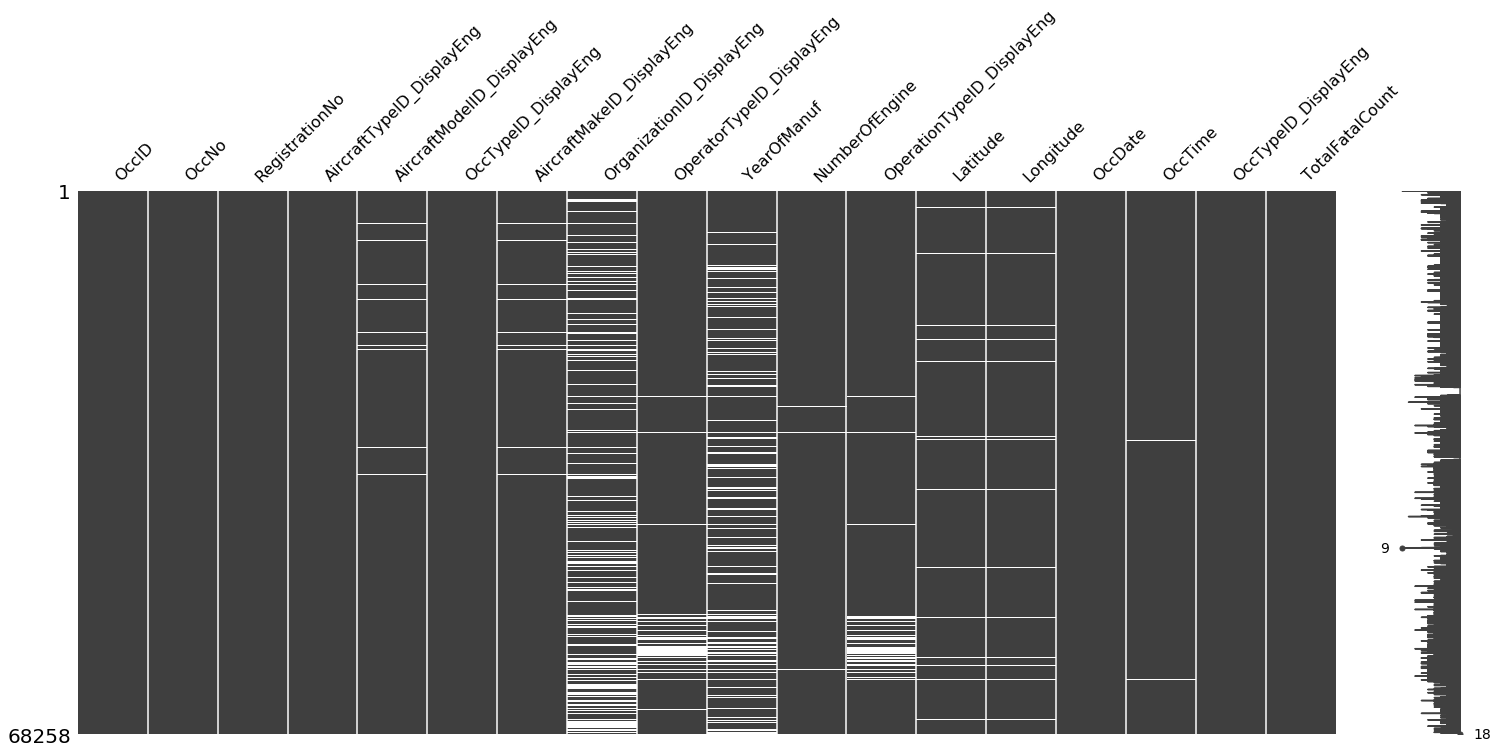

In [150]:
msno.matrix(df)

In [151]:
#Total of missing values

df.isnull().sum().sum()

39055

In [152]:
df.nunique()

OccID                         43855
OccNo                         43855
RegistrationNo                25241
AircraftTypeID_DisplayEng        12
AircraftModelID_DisplayEng     2269
OccTypeID_DisplayEng              2
AircraftMakeID_DisplayEng       767
OrganizationID_DisplayEng      3854
OperatorTypeID_DisplayEng         8
YearOfManuf                     167
NumberOfEngine                    7
OperationTypeID_DisplayEng       24
Latitude                       3405
Longitude                      5918
OccDate                       14308
OccTime                        1425
OccTypeID_DisplayEng              2
TotalFatalCount                  25
dtype: int64

In [153]:
df.describe()

OccID  NumberOfEngine      Latitude     Longitude  \
count   68258.000000    67826.000000  66695.000000  66699.000000   
mean    96671.433239        1.803482     49.288104     91.630903   
std     33708.329076        0.782707      6.506231     23.748059   
min     45001.000000        0.000000      0.000000      0.000000   
25%     66414.000000        1.000000     45.466667     74.566667   
50%     91531.500000        2.000000     49.200000     84.516667   
75%    128285.750000        2.000000     52.050000    114.016667   
max    152828.000000        8.000000     90.000000    180.000000   

       TotalFatalCount  
count     68258.000000  
mean          1.023147  
std          13.564872  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           0.000000  
max         261.000000

In [154]:
Long = df.Longitude * -1

Text(0.5,1,'Lat and Longs')

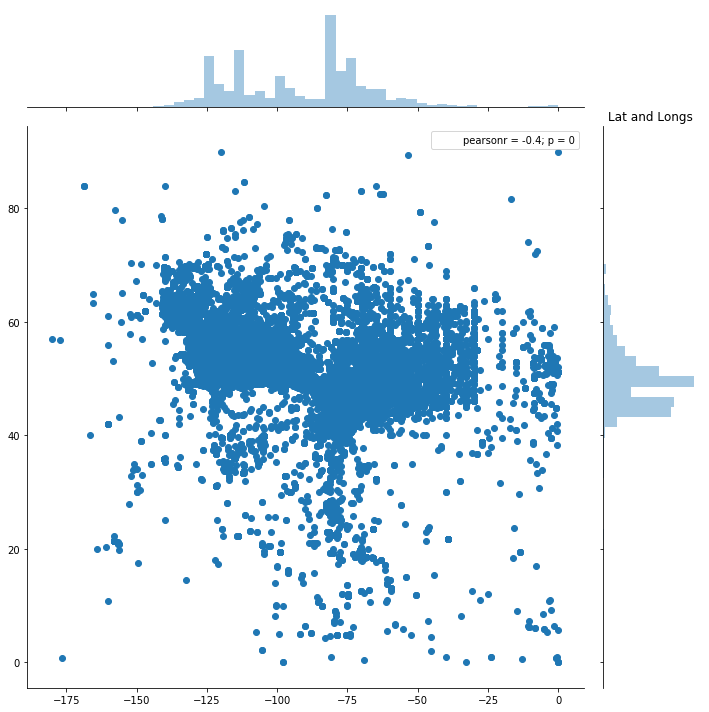

In [155]:
sns.jointplot(x=Long.values, y=df.Latitude.values, size = 10)
plt.title('Lat and Longs')

In [156]:
df.sample(5)

OccID     OccNo RegistrationNo AircraftTypeID_DisplayEng  \
60229   56451  A86O0104         C-GEXS                 AEROPLANE   
25664  108468  A02C0124         C-GPOW                 AEROPLANE   
7041   146329  A14C0130         C-GHGK                 AEROPLANE   
45250   73791  A93O0064         C-GRLF                 AEROPLANE   
53248   65271  A91A0002         N605PE                 AEROPLANE   

      AircraftModelID_DisplayEng OccTypeID_DisplayEng  \
60229                        185             ACCIDENT   
25664                  PA-31-350             ACCIDENT   
7041              JETSTREAM 3100  INCIDENT REPORTABLE   
45250                        152             ACCIDENT   
53248                   747-243B  INCIDENT REPORTABLE   

      AircraftMakeID_DisplayEng OrganizationID_DisplayEng  \
60229                    CESSNA   LEUENBERGER AIR SERVICE   
25664                     PIPER      KEYSTONE AIR SERVICE   
7041          BRITISH AEROSPACE      WESTWIND ENTERPRISES   
45250                    CESSNA      BRAMPTON FLYING CLUB   
53248                    BOEING      CONTINENTAL AIRLINES   

      OperatorTypeID_DisplayEng YearOfManuf  NumberOfEngine  \
60229                COMMERCIAL        1976             1.0   
25664                COMMERCIAL        1974             2.0   
7041                 COMMERCIAL        1987             2.0   
45250                COMMERCIAL        1982             1.0   
53248                COMMERCIAL         NaN             4.0   

      OperationTypeID_DisplayEng   Latitude  Longitude                OccDate  \
60229                   BUSINESS  51.550000      87.90  12/1/1986 12:00:00 AM   
25664              AIR TRANSPORT  49.910000      97.24  6/11/2002 12:00:00 AM   
7041               AIR TRANSPORT  52.166667     106.70  8/20/2014 12:00:00 AM   
45250                   TRAINING  43.450000      79.85  2/28/1993 12:00:00 AM   
53248                   BUSINESS  59.000000      50.00   1/8/1991 12:00:00 AM   

        OccTime OccTypeID_DisplayEng  TotalFatalCount  
60229  11:40:00             ACCIDENT                0  
25664  09:20:00             ACCIDENT                1  
7041   08:10:00  INCIDENT REPORTABLE                0  
45250  17:10:00             ACCIDENT                0  
53248  10:22:00  INCIDENT REPORTABLE                0

In [157]:
df['OccDate'] = pd.to_datetime(df['OccDate'])
#df.OccDate

In [158]:
#df = pd.to_datetime(df['OccDate'], errors='coerce')


In [159]:
#df.OccDate.dt.year

In [160]:
#importing plotly and cufflinks in offline mode
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [161]:
#Removed as there are few occurrences before 1976
#dfen.OccDate.dt.year.iplot(kind='histogram', bins=40, theme='white', title='Ocurrences per year')

In [162]:
#drop prior to 1976
#old = df[(df.OccDate.dt.year < 1976)].index
#dfo = df.drop(old, inplace=True)

In [163]:
df.OccDate.dt.year.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per year')

In [178]:
#plt.hist(df['OccTypeID_DisplayEng']);
#sns.distplot( a=df["OccTypeID_DisplayEng"], hist=True, kde=False, rug=False )
#sns.scatter(x='OccTypeID_DisplayEng', data=df)
#px.bar(df, x='OccTypeID_DisplayEng', template='plotly_white')
#df.OccTypeID_DisplayEng.iplot(kind='histogram', bins=50, theme='white', title='Ocurrences per type')
px.histogram(df, x='OperatorTypeID_DisplayEng', color='OccTypeID_DisplayEng',template='plotly')

ValueError: Grouper for 'OccTypeID_DisplayEng' not 1-dimensional

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68258 entries, 0 to 68257
Data columns (total 18 columns):
OccID                         68258 non-null int64
OccNo                         68258 non-null object
RegistrationNo                68257 non-null object
AircraftTypeID_DisplayEng     68255 non-null object
AircraftModelID_DisplayEng    67149 non-null object
OccTypeID_DisplayEng          68258 non-null object
AircraftMakeID_DisplayEng     67203 non-null object
OrganizationID_DisplayEng     53411 non-null object
OperatorTypeID_DisplayEng     64618 non-null object
YearOfManuf                   57940 non-null object
NumberOfEngine                67826 non-null float64
OperationTypeID_DisplayEng    64074 non-null object
Latitude                      66695 non-null float64
Longitude                     66699 non-null float64
OccDate                       68258 non-null datetime64[ns]
OccTime                       67914 non-null object
OccTypeID_DisplayEng          68258 non-null obje

TypeError: must be str, not float

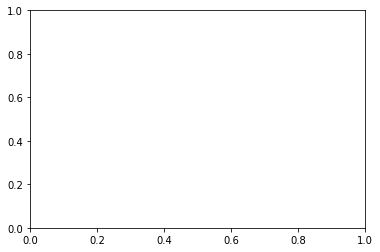

In [180]:
#px.histogram(df, x='OrganizationID_DisplayEng', y='OccTypeID_DisplayEng') 
sns.distplot(df["OperatorTypeID_DisplayEng"])


In [ ]:
g = sns.FacetGrid(df,hue='OccTypeID_DisplayEng',palette='Set1',size=8,aspect=2)
g = g.map(plt.hist,'AircraftMakeID_DisplayEng', bins=20,alpha=0.5)
plt.legend()

In [183]:
px.scatter_matrix(df, dimensions=["OrganizationID_DisplayEng", "TotalFatalCount",
                               "OperatorTypeID_DisplayEng", "AircraftMakeID_DisplayEng"], color = 'OccDate')

KeyboardInterrupt: 

In [165]:
#dfen.TotalFatalCount

In [166]:
df.corr('pearson')

OccID  NumberOfEngine  Latitude  Longitude  \
OccID            1.000000        0.132645 -0.054883  -0.003303   
NumberOfEngine   0.132645        1.000000 -0.061799  -0.174317   
Latitude        -0.054883       -0.061799  1.000000   0.395355   
Longitude       -0.003303       -0.174317  0.395355   1.000000   
TotalFatalCount -0.046396        0.139903 -0.199891  -0.110399   

                 TotalFatalCount  
OccID                  -0.046396  
NumberOfEngine          0.139903  
Latitude               -0.199891  
Longitude              -0.110399  
TotalFatalCount         1.000000

In [177]:
px.scatter(df, x='TotalFatalCount', y="OrganizationID_DisplayEng", 
                   size='TotalFatalCount', size_max=60)
